In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1.Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4.Model Building
# 5.Evaluation
# 6.Improvements
# 7.Website

## 1.Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
87,ham,Yes I started to send requests to make it but ...
2386,ham,No message..no responce..what happend?
3596,spam,Congratulations YOU'VE Won. You're a Winner in...
4084,spam,Orange brings you ringtones from all time Char...
1139,ham,Message:some text missing* Sender:Name Missing...


In [10]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace = True)

In [11]:
df.sample(2)

,target,text
997,ham,Not a lot has happened here. Feels very quiet....
3958,ham,Have a nice day my dear.


In [12]:
from sklearn.preprocessing import LabelEncoder


In [13]:
encoder = LabelEncoder()

In [14]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [15]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [16]:
df['target'] = encoder.fit_transform(df['target'])

In [17]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [18]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
#Check for duplicate value
df.duplicated().sum()

403

In [20]:
df = df.drop_duplicates(keep ='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

## 2. EDA

In [24]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt

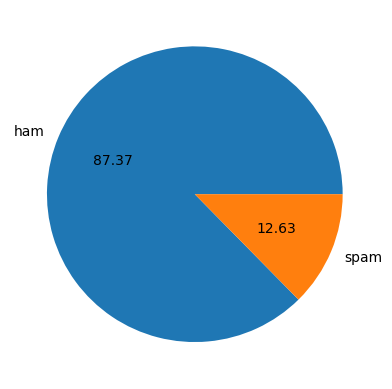

In [26]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [27]:
#Data is imbalanced

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nigee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [31]:
df['num_characters'] = df['text'].apply(len)

In [32]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
#Fetch number of words

In [34]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [35]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [36]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [37]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [38]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [39]:
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [40]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
#ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
#spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [45]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

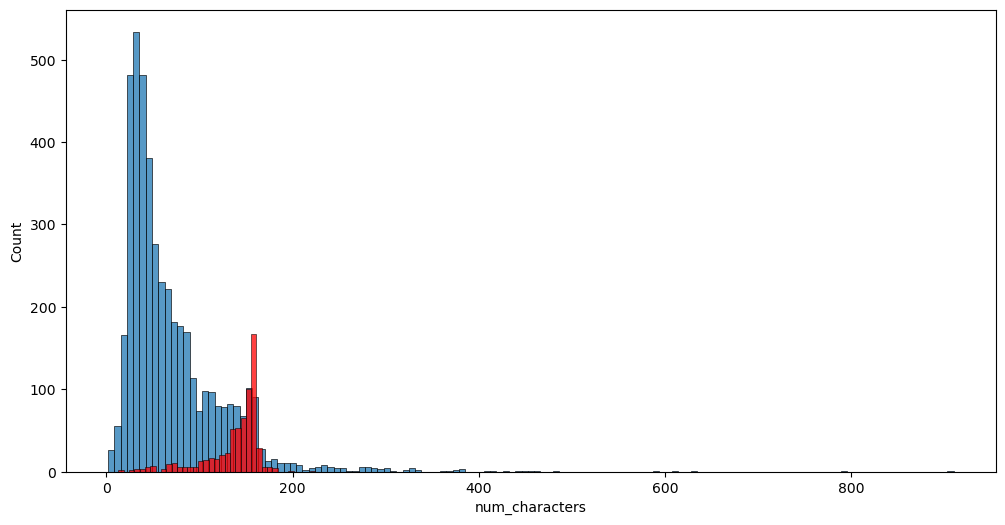

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']== 0]['num_characters'])
sns.histplot(df[df['target']== 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

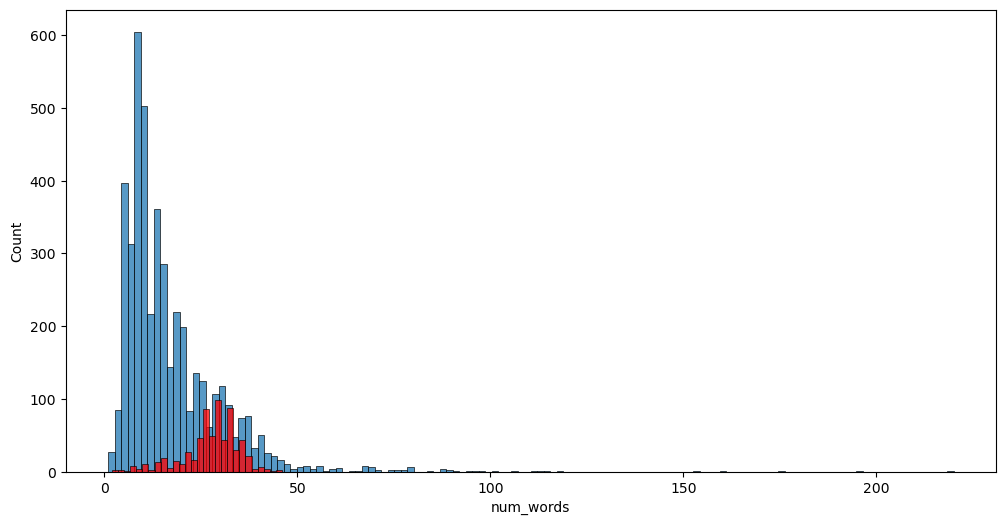

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']== 0]['num_words'])
sns.histplot(df[df['target']== 1]['num_words'],color='red')

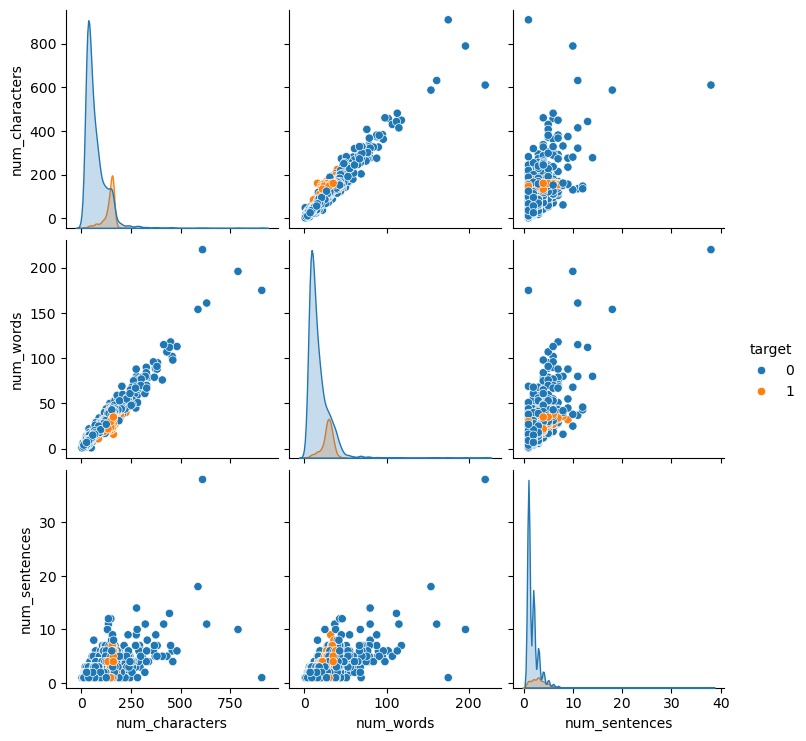

In [48]:
sns.pairplot(df,hue='target')

<Axes: >

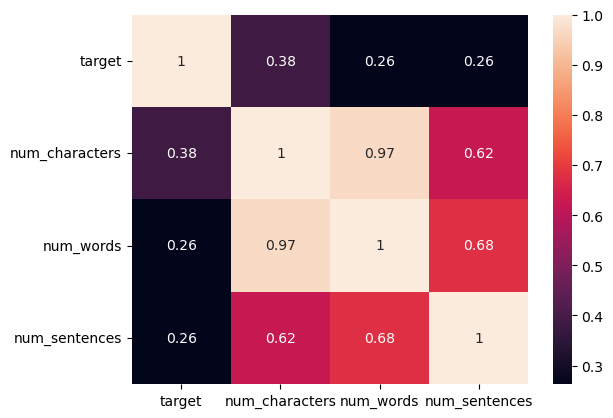

In [49]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True)

### 3.Data Preprocesing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [51]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nigee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [54]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]

    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:] #cloning the list
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
         y.append(ps.stem(i))
        
    return " ".join(y)

In [55]:
transform_text("Hi how are you nigee dancing dance?")

'hi nige danc danc'

In [139]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [141]:
df['transformed_text'] = df['text'].apply(transform_text)

In [142]:
df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [147]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\nigee\anaconda3\python.exe -m pip install --upgrade pip


In [163]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size=10,background_color='white')

In [165]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

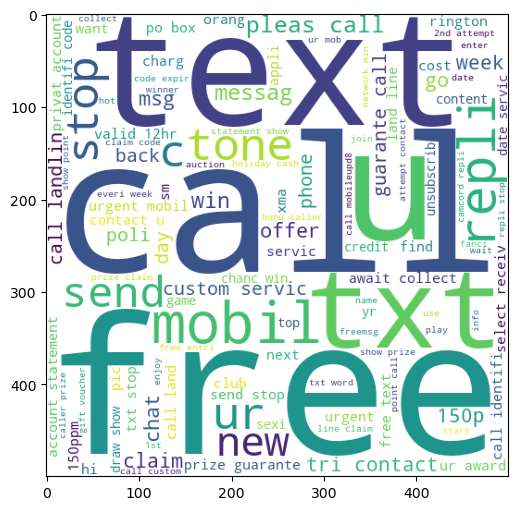

In [169]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [173]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

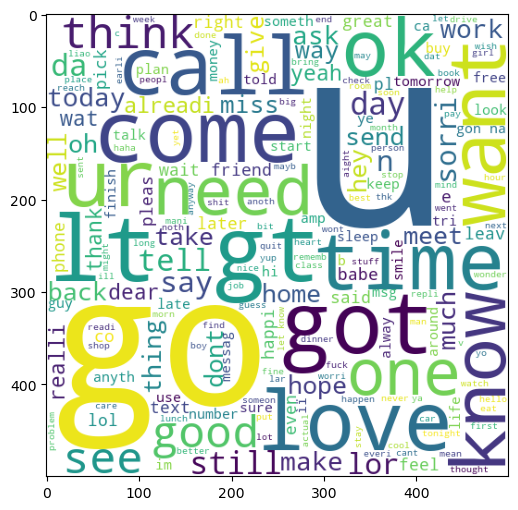

In [175]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [185]:
spam_corpus = []
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for words in msg.split():
       spam_corpus.append(words) 

In [189]:
len(spam_corpus)

9939

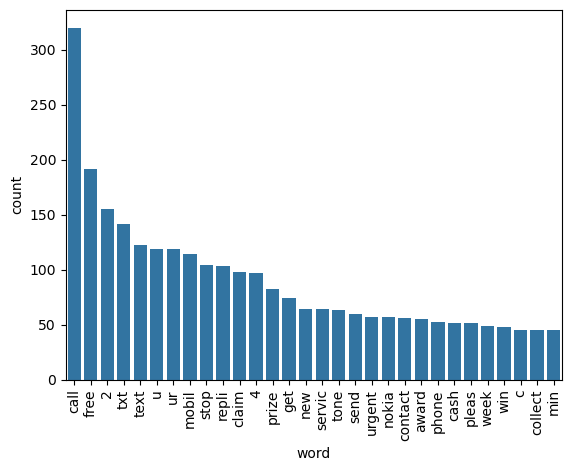

In [211]:
from collections import Counter
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x=word_counts['word'], y=word_counts['count'])

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')
plt.show()

In [213]:
ham_corpus = []
for msg in df[df['target'] ==0]['transformed_text'].tolist():
    for words in msg.split():
       ham_corpus.append(words) 

In [215]:
len(ham_corpus)

35404

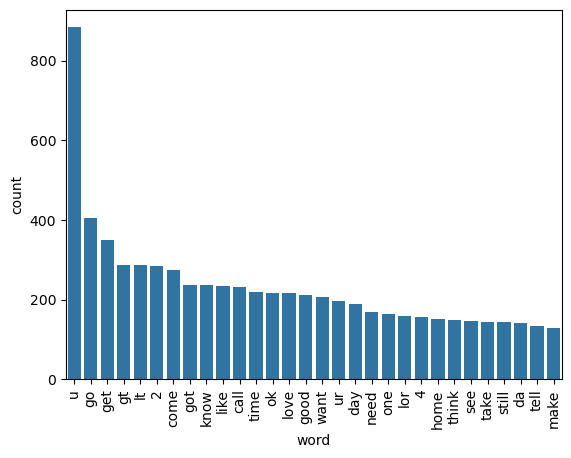

In [217]:
from collections import Counter
word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x=word_counts['word'], y=word_counts['count'])

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')
plt.show()